**Wine 관련 파일은 colab_08-09_Wine.ipynb에 모두 합치려고 하였는데 plt.plot() 모양이 이상하게 나와서 따로 진행하였습니다.**

케라스에서 학습시킬 때 fit 함수를 사용합니다. 이 함수의 반환값으로 히스토리 객체를 얻을 수 있는데, 이 객체는 4가지 정보를 담고 있습니다.

매 에포크마다의 훈련 손실값(loss), 

매 에포크마다의 훈련 정확도(acc->accuracy),

매 에포크마다의 검증 손실값(val_loss),

매 에포크마다의 검증 정확도(val_acc->val_accuracy)

In [ ]:
#데이터 입력
from google.colab import files
uploaded = files.upload()
my_data = 'wine.csv'

Saving wine.csv to wine (1).csv


In [ ]:
!pip install -q tensorflow-gpu==1.15.0
%tensorflow_version 1.x
import tensorflow as tf
import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

# seed 값 설정
numpy.random.seed(3)
tf.compat.v1.set_random_seed(3)

#데이터 적용
df_pre = pd.read_csv(my_data, header=None)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델의 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)


TensorFlow 1.x selected.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Using TensorFlow backend.


In [ ]:
# 모델 실행 및 저장(에포크가 3500번이나 돕니다)
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

Streaming output truncated to the last 5000 lines.
Epoch 1001/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0410 - accuracy: 0.9862 - val_loss: 0.0861 - val_accuracy: 0.9720
Epoch 1002/3500
653/653 [==============================] - 0s 23us/step - loss: 0.0404 - accuracy: 0.9847 - val_loss: 0.0847 - val_accuracy: 0.9720
Epoch 1003/3500
653/653 [==============================] - 0s 21us/step - loss: 0.0425 - accuracy: 0.9862 - val_loss: 0.0852 - val_accuracy: 0.9720
Epoch 1004/3500
653/653 [==============================] - 0s 20us/step - loss: 0.0409 - accuracy: 0.9847 - val_loss: 0.0895 - val_accuracy: 0.9752
Epoch 1005/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0424 - accuracy: 0.9832 - val_loss: 0.0880 - val_accuracy: 0.9752
Epoch 1006/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0403 - accuracy: 0.9816 - val_loss: 0.0849 - val_accuracy: 0.9783
Epoch 1007/3500
653/653 [==============================] - 0s

KeyError: ignored

케라스에서 학습시킬 때 fit 함수를 사용합니다. 이 함수의 반환값으로 히스토리 객체를 얻을 수 있는데, 이 객체는 4가지 정보를 담고 있습니다.

매 에포크마다의 훈련 손실값(loss), 

매 에포크마다의 훈련 정확도(acc->accuracy),

매 에포크마다의 검증 손실값(val_loss),

매 에포크마다의 검증 정확도(val_acc->val_accuracy)

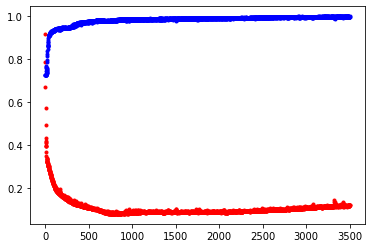

In [ ]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

딥러닝 프레임워크가 만들어 낸 모델을 업데이트 하는 과정입니다. 이를 위해서는 에포크를 얼마나 지정할지 결정해야 합니다. 학습을 반복하는 횟수도 너무 적어도 안 되고 또 너무 많아도 과적합을 일으키므로 문제가 있습니다. 모델의 학습 시간에 따른 정확도와 테스트 결과를 그래프를 통해 확인할 수 있습니다.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
